In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("neo.csv",index_col=False)
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
df = df.drop(["id","name","orbiting_body","sentry_object"],axis=1)
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [4]:
df["hazardous"] = np.where(df["hazardous"] == False, 0, 1)
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [5]:
x = df.drop(["hazardous"],axis=1)
x.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09


In [6]:
x.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
dtypes: float64(5)
memory usage: 3.5 MB


In [8]:
y= df["hazardous"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: hazardous, dtype: int32

In [9]:
x=StandardScaler().fit_transform(x)
x

array([[ 3.58728394,  3.58728394, -1.36391312,  0.79515317, -2.34863167],
       [ 0.46352912,  0.46352912,  1.00903999,  1.09035748, -1.21873486],
       [ 1.9918872 ,  1.9918872 ,  2.61698337,  0.56962356, -1.96854406],
       ...,
       [-0.31984203, -0.31984203, -1.60122795, -0.38769729,  0.37072244],
       [-0.4023702 , -0.4023702 ,  0.83549218,  1.41489044,  1.47643186],
       [-0.29335902, -0.29335902, -0.83194291,  1.01582267,  0.20486602]])

In [10]:
x.shape

(90836, 5)

In [11]:
y.shape

(90836,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.75)
X_train.shape

(68127, 5)

In [13]:
c= np.ones((X_train.shape[0],1),dtype=int)
c.shape

(68127, 1)

In [14]:
x_t_n = np.concatenate([c,X_train], axis=1)
x_t_n.shape

(68127, 6)

In [15]:
th = np.zeros((1,6))
th

array([[0., 0., 0., 0., 0., 0.]])

In [16]:
def create_mini_batches(X,y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    # print(data.shape)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
    return mini_batches
 

In [17]:
cost=[]
y_train = np.array(y_train)
y_train= np.reshape(y_train,(y_train.shape[0],1))
for itr in range(0,10000):
        avg_cost=[]
        mini_batches = create_mini_batches(x_t_n, y_train, 50)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            yt= np.reshape(y_mini,(1,y_mini.shape[0]))
            extra = np.exp(-np.matmul(th,np.transpose(X_mini)))
            yhat = 1/(1+extra)
            avg_cost.append  ((1/(2*X_train.shape[0]))*(np.sum(-(np.matmul((yt),np.transpose(np.log(yhat)))) - (np.matmul((1-yt),np.transpose(np.log(1-(yhat)))) ))))
            th = th -((0.001/X_train.shape[0])*(np.matmul((yhat-yt),X_mini)))
        cost.append( np.mean(avg_cost))


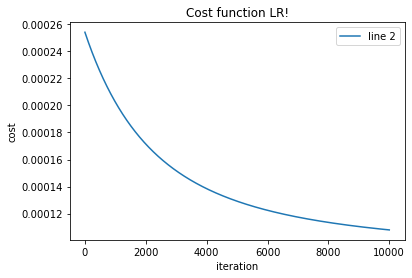

In [18]:
l=np.arange(1,len(cost)+1)
plt.plot(l, cost, label = "line 2")
  
# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('cost')
# giving a title to my graph
plt.title('Cost function LR!')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [19]:
th
np.savetxt("theta.txt", th, delimiter =", ")

In [20]:
c1= np.ones((X_test.shape[0],1),dtype=int)
c1.shape

(22709, 1)

In [21]:
x_test = np.concatenate([c1,X_test], axis=1)
x_test

array([[ 1.        , -0.3456869 , -0.3456869 , -1.02470228,  0.59141228,
         0.57804295],
       [ 1.        , -0.38427614, -0.38427614, -0.85357895, -1.58301163,
         1.06179083],
       [ 1.        , -0.3822676 , -0.3822676 , -0.56524052, -1.48190088,
         1.02723741],
       ...,
       [ 1.        , -0.31885149, -0.31885149, -0.51249875, -0.62490004,
         0.36381175],
       [ 1.        ,  0.86015922,  0.86015922, -0.35198666,  1.08456979,
        -1.49516221],
       [ 1.        , -0.40553472, -0.40553472,  0.35855085, -0.71388039,
         1.58009212]])

In [22]:
df = pd.DataFrame(x_test)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22709 entries, 0 to 22708
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22709 non-null  float64
 1   1       22709 non-null  float64
 2   2       22709 non-null  float64
 3   3       22709 non-null  float64
 4   4       22709 non-null  float64
 5   5       22709 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [23]:
extra = np.exp(-np.matmul(th,np.transpose(x_test)))
# extra.shape
temp = 1/(1+extra)
yhat = []
o,z=0,0
for i in range(0,temp.shape[1]):
    if(temp[0][i] <= 0.5):
        yhat.append(0)
        z=z+1
    else:
        yhat.append(1)
        o=o+1
print(o,z)  
# print(yhat)

159 22550


In [24]:
y_test = np.array(y_test)
y_test = np.reshape((y_test),(y_test.shape[0],1))
y_test.shape

(22709, 1)

In [25]:
yhat = np.array(yhat)
yhat=np.reshape((yhat),(yhat.shape[0],1))
yhat.shape

(22709, 1)

In [26]:
accuracy_score(y_test, yhat)

0.8996873486282971

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='micro')

0.8996873486282971

In [28]:
from sklearn.metrics import classification_report
target_name=['false','true']
print(classification_report(y_test, yhat, target_names=target_name))

              precision    recall  f1-score   support

       false       0.90      0.99      0.95     20504
        true       0.27      0.02      0.04      2205

    accuracy                           0.90     22709
   macro avg       0.59      0.51      0.49     22709
weighted avg       0.84      0.90      0.86     22709



In [29]:
y_test.shape

(22709, 1)

In [30]:
y_test = np.reshape(y_test,(y_test.shape[0]))
yhat = np.reshape(yhat,(yhat.shape[0]))

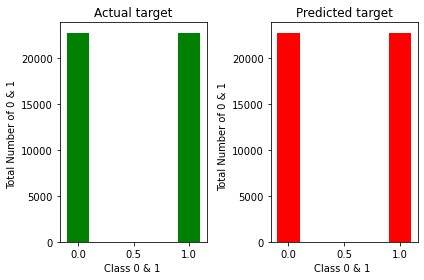

<Figure size 1440x1440 with 0 Axes>

In [31]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.bar(y_test,y_test.shape[0]+1, color ='g', width = 0.2)
plt.title("Actual target")
plt.xlabel('Class 0 & 1 ')
plt.ylabel('Total Number of 0 & 1 ')

plt.subplot(1, 2, 2) # index 2
plt.bar(yhat,yhat.shape[0]+1, color ='r', width = 0.2)
plt.title("Predicted target")
plt.xlabel('Class 0 & 1 ')
plt.ylabel('Total Number of 0 & 1  ')

plt.tight_layout()
plt.figure(figsize = (20, 20))
plt.show()